# Exercise 4 - Data preparation, model training and evaluation

Necessary libraries are being loaded.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the customer data again and enter the first lines.

In [3]:
df = pd.read_csv('prepared_data.csv')
df

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,0,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45
1,Mi,17,0,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0
2,Sa,11,0,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30
3,Fr,13,0,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0
4,Fr,18,0,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277022,Mo,9,1,0,15,Bran,91157,3254028001012,Bran,91157,3254028001003,2020,10,0
277023,Di,18,0,7,15,Bran,91157,3254028001013,Turda,80982,3241013070001,2020,10,105
277024,Di,9,0,2,10,Bran,91157,3254028001013,Bran,91157,3254028003001,2020,10,20
277025,Mo,18,0,5,5,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,2020,10,25


## 4.1 Business Understanding: What is your target variable?

The aim is to develop a model that finds the customers with the highest revenue for the company. It is determined that a customer is considered to have the highest revenue if the total revenue is over 300.

For this purpose, a new attribute "high revenue" is to be calculated using the total revenue of a customer "total_sum". If the threshold value of 300 is exceeded, "high revenue" is marked with "1", otherwise "0". You can use the numpy function np.where(condition,if true, if false) for this.

Add the column "high revenue" to the data set and check the result.

In [4]:
df['weekday'].unique()

array(['Di', 'Mi', 'Sa', 'Fr', 'So/Fe', 'Mo', 'Do', 'Donn', 'Mon', 'Sam'],
      dtype=object)

In [84]:
q1 = df['total'].quantile(0.25)  # first quartil
q2 = df['total'].quantile(0.5)  # third quartile

print(q1, q2)

10.0 20.0


In [97]:

df['high_distance'] = np.where(df['total'] > q2, 2, 
                               np.where(df['total'] > q1, 1, 0))
df

## 4.2 Distribution of the target variable

First of all, we want to know how "high revenue" is distributed in the data.

To do this, the values of "high revenue" are counted using the groupby function and displayed as a bar chart.

<Axes: xlabel='high_distance'>

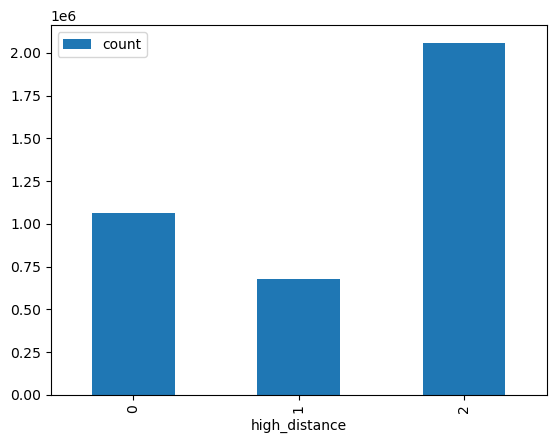

In [86]:
bc = df.groupby('high_distance').agg({'count':'sum'})

bc.plot.bar()

## 4.3 Data reduction & cleansing

With regard to data understanding, the department was consulted and it was determined that not all existing attributes are relevant. Only the following should be used in the data set:

- gender
- age_first_order
- user_agent_brand, user_agent_os
- campaign
- pages_visited_average
- high revenue

In [87]:
# space

This is followed by data cleansing. Display the missing values and carry out the following data cleansing steps:

1. Replace missing values (NaN) with the most common value (dfClean['Attribute'].mode()[0])
The result should be in the variable dfClean.

In [88]:
# space
print(df.isnull().sum())

weekday             0
daytime             0
isHoliday           0
distance            0
count               0
startClusterName    0
startClusterZip     0
startClusterID      0
endClusterName      0
endClusterZip       0
endClusterID        0
year                0
month               0
total               0
high_distance       0
dtype: int64


In [89]:
# space
df

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total,high_distance
0,Di,7,0,3,15,Hunedoara,71171,3254026000002,Hunedoara,71171,3254026000007,2021,3,45,2
1,Mi,17,0,0,10,Turda,80982,3241013050002,Turda,80982,3241013050008,2021,3,0,0
2,Sa,11,0,3,10,Turda,80982,3241013050007,Turda,80982,3241013030001,2021,3,30,2
3,Fr,13,0,0,15,Bran,91157,3254028001012,Bran,91157,3254028001004,2021,3,0,0
4,Fr,18,0,7,10,Bran,91157,3254028001003,Turda,80982,3241013070001,2021,3,70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277022,Mo,9,1,0,15,Bran,91157,3254028001012,Bran,91157,3254028001003,2020,10,0,0
277023,Di,18,0,7,15,Bran,91157,3254028001013,Turda,80982,3241013070001,2020,10,105,2
277024,Di,9,0,2,10,Bran,91157,3254028001013,Bran,91157,3254028003001,2020,10,20,1
277025,Mo,18,0,5,5,Hunedoara,71171,3254026000014,Hunedoara,71171,3254026000003,2020,10,25,2


In the data transformation, we want to perform an encoding into numerical values (even if we do not have ordinal attributes here). We use the LabelEncoder() for this. Apply this to user_agent_os and user_agent_brand as well and see how useful you find the result.

In [98]:
from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()

dfPrepared = df.copy()

labelenc.fit(dfPrepared.weekday)
dfPrepared['weekday'] = labelenc.transform(dfPrepared.weekday)
labelenc.fit(dfPrepared.startClusterName)
dfPrepared['startClusterName'] = labelenc.transform(dfPrepared.startClusterName)
labelenc.fit(dfPrepared.endClusterName)
dfPrepared['endClusterName'] = labelenc.transform(dfPrepared.endClusterName)
dfPrepared.to_csv('prepared_data2.csv', index=False)

dfPrepared

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total,high_distance
0,0,7,0,3,15,1,71171,3254026000002,1,71171,3254026000007,2021,3,45,2
1,4,17,0,0,10,2,80982,3241013050002,2,80982,3241013050008,2021,3,0,0
2,7,11,0,3,10,2,80982,3241013050007,2,80982,3241013030001,2021,3,30,2
3,3,13,0,0,15,0,91157,3254028001012,0,91157,3254028001004,2021,3,0,0
4,3,18,0,7,10,0,91157,3254028001003,2,80982,3241013070001,2021,3,70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277022,5,9,1,0,15,0,91157,3254028001012,0,91157,3254028001003,2020,10,0,0
277023,0,18,0,7,15,0,91157,3254028001013,2,80982,3241013070001,2020,10,105,2
277024,0,9,0,2,10,0,91157,3254028001013,0,91157,3254028003001,2020,10,20,1
277025,5,18,0,5,5,1,71171,3254026000014,1,71171,3254026000003,2020,10,25,2


In [91]:
dfPrepared['startClusterID'].unique()

array([3254026000002, 3241013050002, 3241013050007, 3254028001012,
       3254028001003, 3254028001008, 3254026000001, 3254026000004,
       3254026000015, 3254028001002, 3241013050009, 3241013050001,
       3254028001015, 3254028002001, 3254026000014, 3254026000006,
       3254026000010, 3254026000008, 3254028001013, 3254026000007,
       3254026000005, 3241013080001, 3254028001018, 3254028001006,
       3254028001001, 3241013070001, 3254028001004, 3241013050008,
       3254028007001, 3241013020002, 3254026000012, 3254028001019,
       3254026000003, 3254028001009, 3241013060001, 3254028004001,
       3241013050006, 3254028001017, 3241013020001, 3254028001005,
       3254026000016, 3254028003001, 3254026000009, 3241013010001,
       3254026000013, 3241013040001, 3241013030001, 3254028001014,
       3254028005001, 3254028006001])

## 4.4 Splitting into training & test data
The target attribute is separated from the data frame. Training and test data are split in a ratio of 70:30. Using the "stratify" option, the distribution of the target attribute is identical to that in the source data.

In [92]:
from sklearn.model_selection import train_test_split

x = dfPrepared.drop(['high_distance'], axis = 1)
y = dfPrepared['high_distance']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.2)

## 4.5 Decision Tree model
For example, a decision tree is trained with the split data set and then evaluated on the test data. 

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 10)
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)


## 4.6 Evaluation of the model
This is followed by the evaluation of the model on the test data.

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18880
           1       1.00      1.00      1.00     12128
           2       1.00      1.00      1.00     24398

    accuracy                           1.00     55406
   macro avg       1.00      1.00      1.00     55406
weighted avg       1.00      1.00      1.00     55406



The absolute distribution is shown in the form of a confusion matrix.

In [80]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[18880     0     0]
 [    0 12128     0]
 [    0     0 22090]]


How would you rate the quality of the model?

# 4.6.1 Error Rate

Now we want to calculate the error rate of our classifier. You can simply calculate it using the confusion matrix (we simply add up the misclassified ones and divide by n) or with y_pred and y_test.

In [46]:
# simple logic but more lines of code
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# False positives are generally the value in the first row, second column of the confusion matrix
false_positives = cm[0, 1]

# False negatives are generally the value in the second row, first column of the confusion matrix
false_negatives = cm[1, 0]

# Add up false positives and false negatives
total_errors = false_positives + false_negatives

# Calculate the total number of predictions
total_predictions = cm.sum()

# Calculate the error rate
error_rate = (total_errors / total_predictions) * 100

print(f"Error rate: {error_rate:.2f}%")

Error rate: 0.00%


In [47]:
# also possible, less lines of code
# Calculate the number of incorrect predictions
incorrect_predictions = (y_pred != y_test).sum()

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the error rate
error_rate = (incorrect_predictions / total_predictions) * 100

print(f"Error Rate: {error_rate:.2f}%")

Error Rate: 0.00%


# 4.6.2 derive information from the confusion matrix

We do have the classification report, but I personally find it sometimes cumbersome to read and perhaps we only want to know a certain key figure. simply replace the variables a-i

In [48]:
# simple logic but more lines of code
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# False positives are generally the value in the first row, second column of the confusion matrix
false_positives = cm[0, 1]

# False negatives are generally the value in the second row, first column of the confusion matrix
false_negatives = cm[1, 0]

# true negatives are generally the value in the first row, first column of the confusion matrix
true_negatives = cm[0, 0]

# true positives are generally the value in the second row, second column of the confusion matrix
true_positives = cm[1, 1]

# calculate the key figures now. just look at the formulae.

#Accuracy
Accuracy = (true_positives + true_negatives)/ (cm.sum())
print (Accuracy)

#Missclassification Rate (Accuracy + Missclassification Rate = 1)
Missclassification_Rate = 1 - Accuracy
print (Missclassification_Rate)

# True positive Rate
TruePositive_Rate = true_positives /(true_positives + false_negatives)
print (TruePositive_Rate)

# True negative Rate
TrueNegative_Rate = false_positives /(false_positives + true_negatives)
print (TrueNegative_Rate)

1.0
0.0
1.0
0.0


# 4.6.3 ROC Curve

This is how the ROC Curve of an perfect classifier looks like. ignore the code.

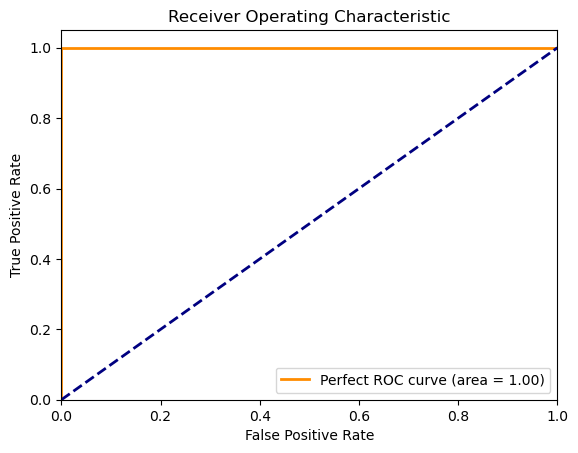

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulate perfect classifier scores
# We assume scores are perfect, such that all positives are ranked higher than all negatives
y_true = [0, 0, 1, 1]  # Actual classes
y_scores = [0, 0.1, 0.9, 1]  # Predicted scores

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Perfect ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### the better the classifier, the stronger the curve in the upper left corner

### let's look at our roc curve now

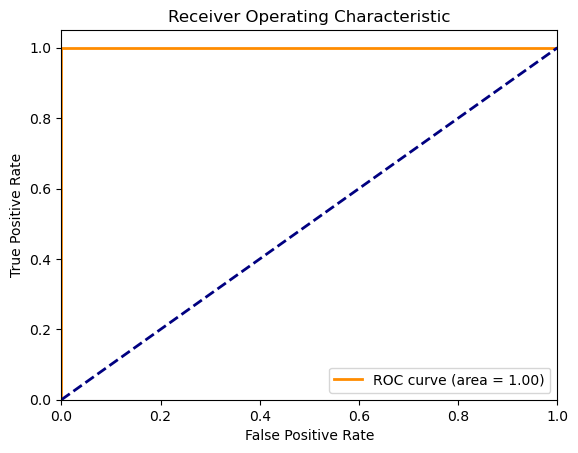

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# First, you need to predict the probabilities instead of the class labels
y_scores = dt_model.predict_proba(x_test)[:, 1]  # get the probabilities of the positive class

# Compute the ROC curve and the AUC (Area Under Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 4.7 k-fold Cross-Validation
Step 5 is repeated with a k-fold cross validation with k = 10. Previously, the score only referred to one test data set. Cross-validation generates 10 scores through 10 iterations. The mean value of the scores is then displayed.

In [51]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = dt_model, X = x, y = y, cv = 10, n_jobs = 4,
                        return_estimator = True, return_train_score = True)

dfScores = pd.DataFrame.from_dict(scores)
dfScores['test_score'].mean()

1.0

Now compare the cross-validation score with the one above. What does the difference tell you? Display the individual scores.

In [ ]:
# space

### Why should you not test the leave-one-out variant?

In [ ]:
# space

# Additional Excercise: let's evaluate a regression
I have only created an exemplary regression here. you can ignore the code.

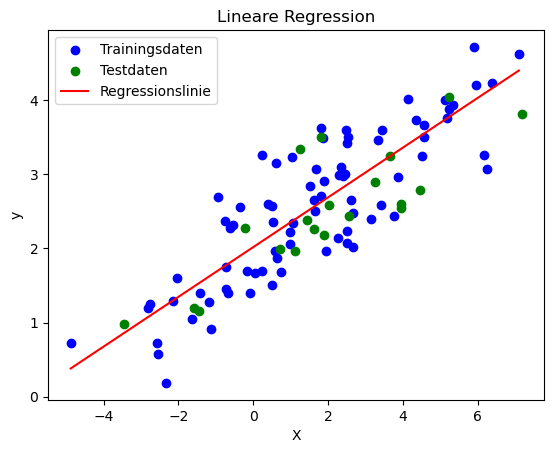

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   
res = 0.5 * np.random.randn(100)       
y = 2 + 0.3 * X + res                 

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

line_x = np.linspace(min(X_train), max(X_train), 100)
line_y = model.intercept_ + model.coef_ * line_x

plt.scatter(X_train, y_train, color='blue', label='Trainingsdaten')
plt.scatter(X_test, y_test, color='green', label='Testdaten')
plt.plot(line_x, line_y, color='red', label='Regressionslinie')
plt.title('Lineare Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


### we do not derive the key figures here from other figures, but calculate them directly with python libraries 

In [53]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.245222733362597


I think the RMSE is even cooler because the RMSE is in the same unit as the data points. you can simply take the root of the MSE.

In [54]:
import numpy as np

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.4951996903902475


In [55]:
from sklearn.metrics import mean_absolute_percentage_error

#calculate Mean Absolute Percentage Error (MAPE) 
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.1742962792727952


In [56]:
from sklearn.metrics import r2_score
# calculate R^2 Score 
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6280065468471038
